Checking the SIR Poletti model with the fitted parameters - was confused by how they looked before.

In [1]:
import ODE_models_why as ODE_models
import Model_stats
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import math

In [2]:
#recovery_days = 2.8 # average length of infection (current baseline from 2012)
gamma = 0.18561062 # rate of recovery

beta_S = 0.29998943 # infection rate for symptomatic infectives
beta_A = 0.36045797 # infection rate for asymptomatic infectives

q = 0.69620799  # reduction factor for those with altered/adjusted behavior
p = 0.60070781   # probability of developing symptoms

#avg_memory = 2.8   # average length of memory regarding active cases
nu  = 0.16060246  # rate of forgetting past "new case" counts

M_thresh = 0.01 # risk threshold 
m = 1/M_thresh

rho = 20.85949009 # speed of behavioral changes (1/days)

mu = 10**(-8)  # irrational exploration with fixed units

xi = 0.33333



In [10]:
def get_params1(gamma=0.18561062, beta_S=0.29998943, beta_A=0.36045797,
              q=0.69620799, p=0.60070781, nu=0.16060246, m=(1/0.01), rho=20.85949009,
              mu=(10**(-8)), xi=(1/3), deathdelt = 0.02):
    
    params = [gamma,beta_S, beta_A, q, p, nu, m, rho, mu, xi,deathdelt]
    
    return params


In [11]:
og_params1 = get_params1()

In [12]:


Sn_0ny = .99
Sa_0  =  .005
IS_0ny  = .005
IAn_0 = 0
IAa_0 = 0
RS_0  = 0
RAn_0 = 0
RAa_0 = 0
M_0   = 0.01

#newyork
initial_stateny = np.array([Sn_0ny,Sa_0,IS_0ny,IAn_0,IAa_0,RS_0,RAn_0,RAa_0,M_0])


time = np.arange(0,300,0.001)

sim_system = odeint(ODE_models.SIRan_system, initial_stateny, time, args=(og_params1,))

#simE_system = odeint(ODE_models.SEIRan_system, initial_stateE, time, args=(og_params,))

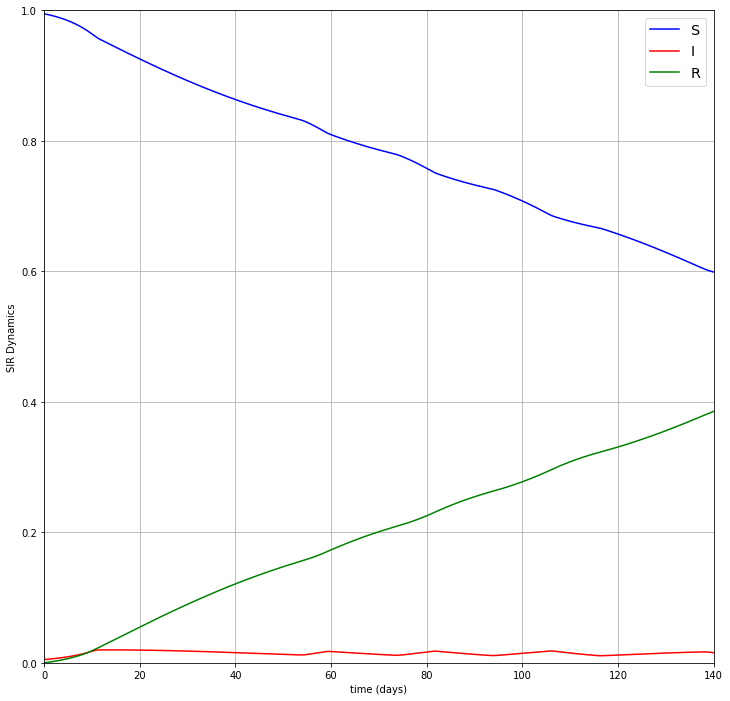

In [13]:
fin_time = 140

matplotlib.rcParams['figure.figsize'] = [12, 12]
fig, ax = plt.subplots()

S = sim_system[:,0]+sim_system[:,1]
I = sim_system[:,2]+sim_system[:,3]+sim_system[:,4]
R = sim_system[:,5]+sim_system[:,6]+sim_system[:,7]

S_curve, = ax.plot(time, S, '-b')
I_curve, = ax.plot(time, I, '-r')
R_curve, = ax.plot(time, R, '-g')

ax.set(xlabel='time (days)', ylabel='SIR Dynamics')
ax.set_ylim((0,1))
ax.set_xlim((0,fin_time))
ax.grid()
ax.legend((S_curve,I_curve,R_curve),('S','I','R'),loc='best',fontsize='x-large')

Never mind what came before - this does look the same.

Still looks strange though.